# Text corpus creation and binary classification using DNN

### 1: Dataset Creation:

__Dataset is created as text file__

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import re
from string import punctuation

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
df = pd.read_table("dataset.txt", delimiter="|")

In [3]:
df.head()

,Quotes,Labels
0,"Look deep into nature, and then you will under...",0
1,Colors are the smiles of nature.,0
2,"I believe in God, only I spell it Nature.",0
3,"Nature does not hurry, yet everything is accom...",0
4,"If you truly love nature, you will find beauty...",0


In [4]:
print("Number of rows in the dataset=", df.shape[0], 
      "\nNumber of columns in the dataset=", df.shape[1], 
      "\nSize of dataset =", df.size)

Number of rows in the dataset= 40 
Number of columns in the dataset= 2 
Size of dataset = 80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quotes  40 non-null     object
 1   Labels  40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


### 2. Pre-processing:

In [6]:
def clean_text(text):
    text = text.lower()
    nopunc = [char for char in text if char not in punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word not in stopwords]

In [7]:
df['Clean_Quotes'] = df['Quotes'].apply(lambda x: ' '.join(clean_text(x)))

In [8]:
df.head()

,Quotes,Labels,Clean_Quotes
0,"Look deep into nature, and then you will under...",0,look deep nature understand everything better
1,Colors are the smiles of nature.,0,colors smiles nature
2,"I believe in God, only I spell it Nature.",0,believe god spell nature
3,"Nature does not hurry, yet everything is accom...",0,nature hurry yet everything accomplished
4,"If you truly love nature, you will find beauty...",0,truly love nature find beauty everywhere


#### Creating TfidfVectorizer

In [9]:
vectorizer = TfidfVectorizer()

tfidf_wm = vectorizer.fit_transform(df['Clean_Quotes'])

tfidf_tokens = vectorizer.get_feature_names()

df_tfidf = pd.DataFrame(data=tfidf_wm.toarray(), columns=tfidf_tokens)

print("\nTD-IDF Vectorizer\n")
print(df_tfidf)


TD-IDF Vectorizer

    accomplished  acquiring       act      acts   adopted  advanced  advances  \
0       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
1       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
2       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
3       0.519026   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
4       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
5       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
6       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
7       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
8       0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
9       0.000000   0.000000  0.000000  0.574749  0.000000  0.000000   0.00000   
10      0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
11      

In [10]:
df_tfidf.shape

(40, 149)

In [11]:
df_tfidf.head()

,accomplished,acquiring,act,acts,adopted,advanced,advances,agreement,appallingly,argue,...,use,useful,visit,whether,whole,word,work,world,wrong,yet
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.519026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466681
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Dataset Preparation

In [24]:
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Model Creation

In [27]:
model =Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics='accuracy')

In [29]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.1721 - accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1243 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 11/100
3/3 [===========

In [30]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 101ms/step - loss: 6.2657e-04 - accuracy: 1.0000


[0.0006265719421207905, 1.0]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


### Analysis

In [32]:
# 8 nodes

model =Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics='accuracy')

In [33]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 1.0000


In [34]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 68ms/step - loss: 0.1781 - accuracy: 1.0000


[0.17810305953025818, 1.0]

In [36]:
# 16 nodes

model =Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [37]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.4933


In [38]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.2903 - accuracy: 0.5200


[0.2902664840221405, 0.5199999809265137]

In [39]:
# 32 nodes

model =Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [40]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 1.0000


In [41]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.1735 - accuracy: 1.0000


[0.1734815537929535, 1.0]

In [42]:
# 64 nodes

model =Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [43]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.4533


In [44]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.2339 - accuracy: 1.0000


[0.23386691510677338, 1.0]

In [45]:
# 128 nodes

model =Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [46]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.3333


In [47]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 62ms/step - loss: 0.2818 - accuracy: 0.5200


[0.2817752957344055, 0.5199999809265137]

In [48]:
# 256 nodes

model =Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [49]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 1.0000


In [50]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 65ms/step - loss: 0.1758 - accuracy: 1.0000


[0.17583021521568298, 1.0]

In [51]:
# 512 nodes

model =Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [52]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 1.0000


In [53]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 70ms/step - loss: 0.1596 - accuracy: 1.0000


[0.15961360931396484, 1.0]

In [54]:
# 1028 nodes

model =Sequential()
model.add(Dense(1028,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [55]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 1.0000


In [56]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 83ms/step - loss: 0.1504 - accuracy: 1.0000


[0.1503923535346985, 1.0]

In [57]:
# 2 layers

model =Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [58]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.5067


In [59]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 74ms/step - loss: 0.2359 - accuracy: 0.4800


[0.23591509461402893, 0.47999998927116394]

In [60]:
# 3 layers
model =Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [61]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9733


In [62]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 75ms/step - loss: 0.2216 - accuracy: 1.0000


[0.22162634134292603, 1.0]

In [63]:
# 4 layers
model =Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [64]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.5467


In [65]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 74ms/step - loss: 0.2105 - accuracy: 1.0000


[0.21049949526786804, 1.0]

In [66]:
# 5 layers
model =Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',metrics='accuracy')

In [67]:
model.fit(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.5467


In [68]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 98ms/step - loss: 0.2238 - accuracy: 0.8800


[0.2237820029258728, 0.8799999952316284]

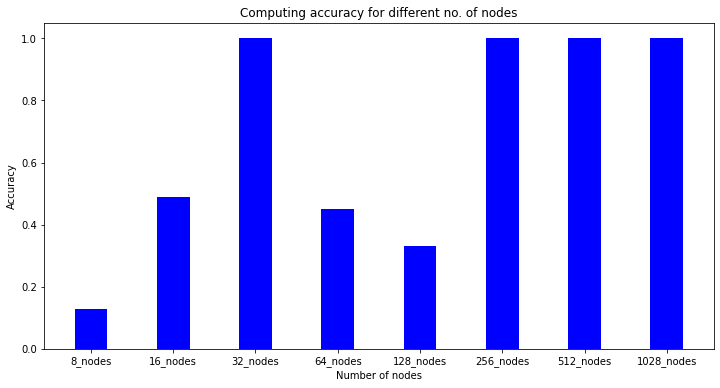

In [70]:
# creating the barchart
bar={'8_nodes':0.13,'16_nodes':0.49,'32_nodes':1.0,'64_nodes':0.45,'128_nodes':0.33,'256_nodes':1.0,'512_nodes':1.0,'1028_nodes':1.0}
nodes = list(bar.keys())
acc = list(bar.values())

fig = plt.figure(figsize = (12, 6))

# creating the bar plot
plt.bar(nodes, acc, color ='blue',width = 0.4)

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of nodes")
plt.show()

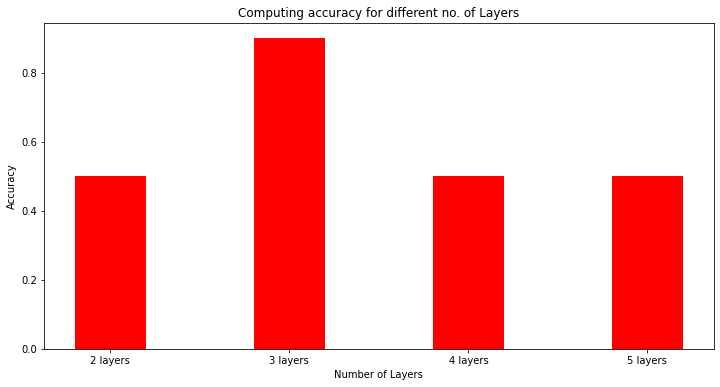

In [71]:
# creating the barchart
bar={'2 layers':0.5,'3 layers':0.9,'4 layers':0.5,'5 layers':0.5}
layers = list(bar.keys())
values = list(bar.values())

fig = plt.figure(figsize = (12, 6))

# creating the bar plot
plt.bar(layers, values, color ='red',width = 0.4)

plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of Layers")
plt.show()